# Twitter API 


In [1]:
## IMPORTING LIBRARIES


# TWITTER API
from tweepy import API 
from tweepy import Cursor
from tweepy import OAuthHandler
import twitter_credentials
import tweepy

# DATA FRAME AND VISUAL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#NATURAL LANGUAGE PROCESSSING
import spacy
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import re



# Getting data From Twitter users 

In [2]:
auth = OAuthHandler(twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET)
auth.set_access_token(twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [8]:
search_words = "#AMZN" + " -filter:retweets"
#date_since = "2021-06-01" since = date_since
LOCATIONS = [35.000000,30.516667,-81.000000,-85.883333]  
tweets = tweepy.Cursor(api.search,q = search_words, locations =LOCATIONS ,lang = 'en',tweet_mode='extended').items(500)


In [9]:
json_data = [tweet._json for tweet in tweets]

df = pd.json_normalize(json_data)
df  = df[["created_at","full_text"]]

df.head()
    

,created_at,full_text
0,Thu Jul 01 19:57:56 +0000 2021,#NZDCAD Target Hit! 90 PIPS Profit 🔥\n\nCheck ...
1,Thu Jul 01 19:54:37 +0000 2021,Important growth and change. #amzn https://t.c...
2,Thu Jul 01 18:56:34 +0000 2021,"$FB #FB awesome hold of 347 today, our JULY.16..."
3,Thu Jul 01 18:55:18 +0000 2021,#GBPNZD All Target Hit! 185 PIPS PROFIT 🔥👍🏻⚡️\...
4,Thu Jul 01 18:03:26 +0000 2021,Don't fall for fomo. but don't miss it.\n$utme...


# Extracting data from finviz.com

In [10]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt



finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker
    
    req = Request(url = url, headers ={'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id ='news-table')
    news_tables[ticker] = news_table    


In [11]:

for row in news_tables['AMZN'].find_all("tr"):
    date_data = row.td.text.split(" ")
    if len(date_data) > 1:
        date = date_data[0]
        time = date_data[1]
    else:
        time = date_data[0]
    data ={"full_text":row.a.text , "created_at":date}
    df = df.append(data, ignore_index=True)

In [12]:
df

,created_at,full_text
0,Thu Jul 01 19:57:56 +0000 2021,#NZDCAD Target Hit! 90 PIPS Profit 🔥\n\nCheck ...
1,Thu Jul 01 19:54:37 +0000 2021,Important growth and change. #amzn https://t.c...
2,Thu Jul 01 18:56:34 +0000 2021,"$FB #FB awesome hold of 347 today, our JULY.16..."
3,Thu Jul 01 18:55:18 +0000 2021,#GBPNZD All Target Hit! 185 PIPS PROFIT 🔥👍🏻⚡️\...
4,Thu Jul 01 18:03:26 +0000 2021,Don't fall for fomo. but don't miss it.\n$utme...
...,...,...
411,Jun-27-21,10 fascinating things people are buying way mo...
412,Jun-27-21,Indian commerce minister: 'Arrogant' U.S. ecom...
413,Jun-27-21,Indian commerce minister: 'Arrogant' U.S. ecom...
414,Jun-27-21,Investors Continue to Warm to SNOW Stock


In [13]:
# clean text
# create a funciton to clean text

def clean_text(text):
    text = text.lower() # ignore Case
    text = re.sub(r"[\#|\@][A-Za-z0-9]*", "", text) # hastag and @mentions gone
    text= re.sub(r'http:?\/\/[A-Za-z]+', "", text) #Removes # http + what ever 
    text= re.sub(r'http[A-Za-z]+', "", text) #Removes # http + what ever 
    text =re.sub(r'[^A-Za-z0-9\s]',"", text) # removing not alpahabet, non digit, and space
    text = re.sub( '/(\r\n)+|\r+|\n+|\t+/', ' ', text ) # deals \n 
    text = re.sub( '\w+\d+\w*', '', text ) # deals \n 
    return text


df['clean_text'] = df['full_text'].apply(clean_text)


In [14]:
df.head(10)

,created_at,full_text,clean_text
0,Thu Jul 01 19:57:56 +0000 2021,#NZDCAD Target Hit! 90 PIPS Profit 🔥\n\nCheck ...,target hit pips profit check out my bio to ...
1,Thu Jul 01 19:54:37 +0000 2021,Important growth and change. #amzn https://t.c...,important growth and change
2,Thu Jul 01 18:56:34 +0000 2021,"$FB #FB awesome hold of 347 today, our JULY.16...",fb awesome hold of today our calls are up ...
3,Thu Jul 01 18:55:18 +0000 2021,#GBPNZD All Target Hit! 185 PIPS PROFIT 🔥👍🏻⚡️\...,all target hit pips profit check out my bio...
4,Thu Jul 01 18:03:26 +0000 2021,Don't fall for fomo. but don't miss it.\n$utme...,dont fall for fomo but dont miss it utme dutv ...
5,Thu Jul 01 17:07:11 +0000 2021,🎣🎣\nAMZN Call\nLotto🎱\n$AMZN\n#AMZN\n🐟🐠 https:...,amzn call lotto amzn
6,Thu Jul 01 17:02:57 +0000 2021,"#AUDUSD All Targets Hit, 70 PIPS Profit🔥🔥\n\nG...",all targets hit pips profit go and checkout ...
7,Thu Jul 01 16:52:00 +0000 2021,@CNBC @CNBCFastMoney I'd love to see an on-air...,id love to see an onair discussion regarding...
8,Thu Jul 01 16:22:33 +0000 2021,"@ThetaWarrior @TrendSpider When it flies, it F...",when it flies it flies thats a good setup fo...
9,Thu Jul 01 16:22:29 +0000 2021,My Amazon (#AMZN) story and why alt-coins like...,my amazon story and why altcoins like have t...


In [15]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
custom_stops =["https", "id","day","co","amp","monday",
               "tuesday","wednesday","thursday","friday",
               "saturday","sunday","today","yesterday",
               "tomorrow","month","link","bio","pip",
              "free","new","learn","daily", "open","close"]

def remove_stopWords(text):
    
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    tokens =[token.text.lower() for token in doc if (not token.is_stop) and (not token.is_punct)]

    return " ".join(token for token in tokens if token not in stopwords + custom_stops)



df['clean_text'] = df['clean_text'].apply(remove_stopWords)

df.head()



,created_at,full_text,clean_text
0,Thu Jul 01 19:57:56 +0000 2021,#NZDCAD Target Hit! 90 PIPS Profit 🔥\n\nCheck ...,target hit pips profit check telegram fo...
1,Thu Jul 01 19:54:37 +0000 2021,Important growth and change. #amzn https://t.c...,important growth change
2,Thu Jul 01 18:56:34 +0000 2021,"$FB #FB awesome hold of 347 today, our JULY.16...",fb awesome hold calls amzn nvda...
3,Thu Jul 01 18:55:18 +0000 2021,#GBPNZD All Target Hit! 185 PIPS PROFIT 🔥👍🏻⚡️\...,target hit pips profit check telegram fo...
4,Thu Jul 01 18:03:26 +0000 2021,Don't fall for fomo. but don't miss it.\n$utme...,nt fall fomo nt miss utme dutv ubt nok wacc ...


In [16]:

def lemmatization(texts,allowed_posttags = ['ADJ','VERB',"ADV"]):
    nlp = spacy.load("en_core_web_sm" , disable = ['parser','ner'])
    doc = nlp(texts)
    lemmas = [token.lemma_ for token in doc if token.pos_ in allowed_posttags]
    lemmas = " ".join(lemmas)
    
    return lemmas

df['clean_text'] =  df['clean_text'].apply(lemmatization)

df.head()

,created_at,full_text,clean_text
0,Thu Jul 01 19:57:56 +0000 2021,#NZDCAD Target Hit! 90 PIPS Profit 🔥\n\nCheck ...,hit check forex cheer
1,Thu Jul 01 19:54:37 +0000 2021,Important growth and change. #amzn https://t.c...,important
2,Thu Jul 01 18:56:34 +0000 2021,"$FB #FB awesome hold of 347 today, our JULY.16...",awesome hold call amzn aapl
3,Thu Jul 01 18:55:18 +0000 2021,#GBPNZD All Target Hit! 185 PIPS PROFIT 🔥👍🏻⚡️\...,hit check forex cheer
4,Thu Jul 01 18:03:26 +0000 2021,Don't fall for fomo. but don't miss it.\n$utme...,fall miss utme pdsb avax gnsh cvac enph vtiq top


In [17]:
# Subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['full_text'].apply(getSubjectivity)
df['Polarity']  = df['full_text'].apply(getPolarity)


In [18]:
df.head()

,created_at,full_text,clean_text,Subjectivity,Polarity
0,Thu Jul 01 19:57:56 +0000 2021,#NZDCAD Target Hit! 90 PIPS Profit 🔥\n\nCheck ...,hit check forex cheer,0.8,0.5
1,Thu Jul 01 19:54:37 +0000 2021,Important growth and change. #amzn https://t.c...,important,1.0,0.4
2,Thu Jul 01 18:56:34 +0000 2021,"$FB #FB awesome hold of 347 today, our JULY.16...",awesome hold call amzn aapl,1.0,1.0
3,Thu Jul 01 18:55:18 +0000 2021,#GBPNZD All Target Hit! 185 PIPS PROFIT 🔥👍🏻⚡️\...,hit check forex cheer,0.8,0.5
4,Thu Jul 01 18:03:26 +0000 2021,Don't fall for fomo. but don't miss it.\n$utme...,fall miss utme pdsb avax gnsh cvac enph vtiq top,0.0,0.0


In [19]:
def getAnalysis(score):
    
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)

<AxesSubplot:xlabel='Analysis'>

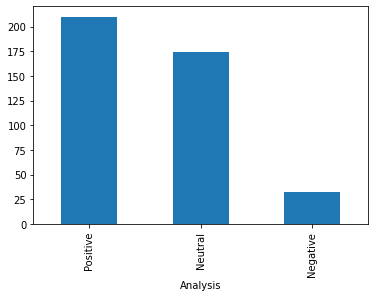

In [20]:
df.value_counts('Analysis').plot(kind='bar')

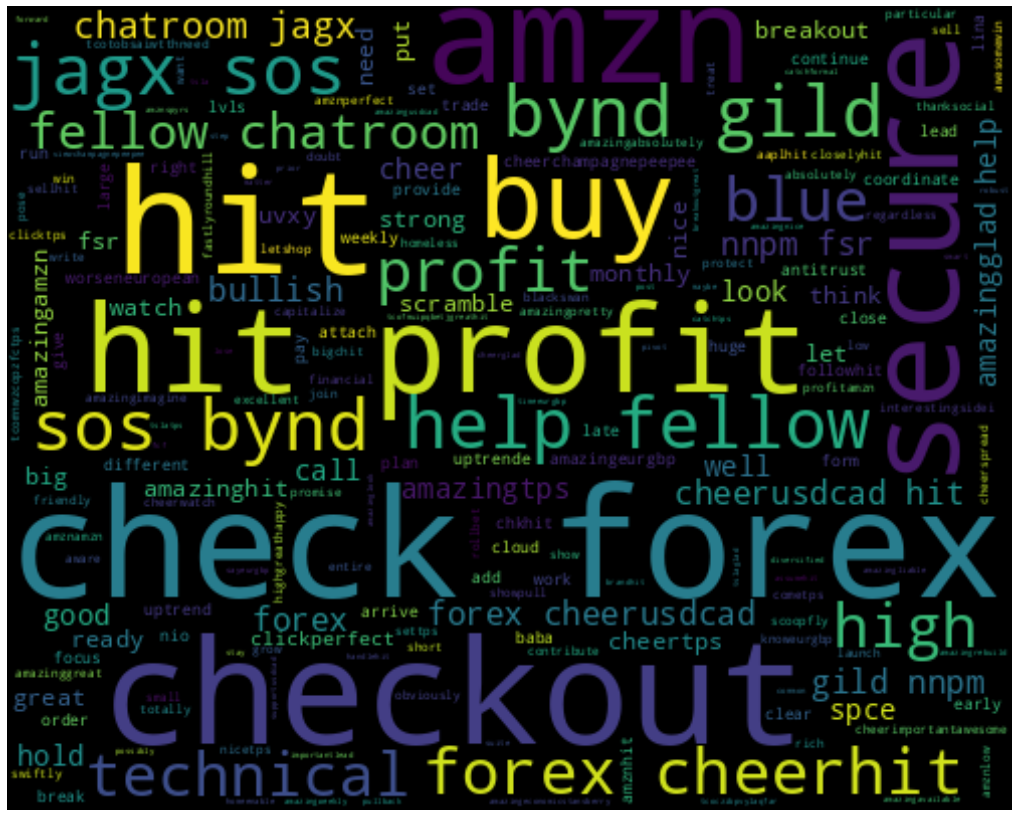

In [21]:
df_positive = df[df['Analysis'] =='Positive']

positive_tweets ="".join([tweet for tweet in df_positive['clean_text']])


wordcloud = WordCloud(width=500, height=400, random_state=21, max_font_size=119).generate(positive_tweets)

plt.figure(figsize=(18,18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
df_sorted = df.sort_values('Polarity', ascending=False)

df_sorted.head()

,created_at,full_text,clean_text,Subjectivity,Polarity,Analysis
70,Wed Jun 30 14:50:14 +0000 2021,Win! My #hopper just sold #AMZN with 7.62% pro...,win sell,0.4,1.0,Positive
2,Thu Jul 01 18:56:34 +0000 2021,"$FB #FB awesome hold of 347 today, our JULY.16...",awesome hold call amzn aapl,1.0,1.0,Positive
373,Jun-29-21,10 Best Dividend Stocks to Buy According to Cr...,good buy accord,0.3,1.0,Positive
69,Wed Jun 30 14:50:15 +0000 2021,Happy! My #hopper just sold #AMZN with 7.81% p...,happy sell awesome,1.0,1.0,Positive
381,Jun-29-21,10 Best Dividend Stocks to Buy According to Al...,good buy accord,0.3,1.0,Positive


<AxesSubplot:xlabel='Polarity', ylabel='Subjectivity'>

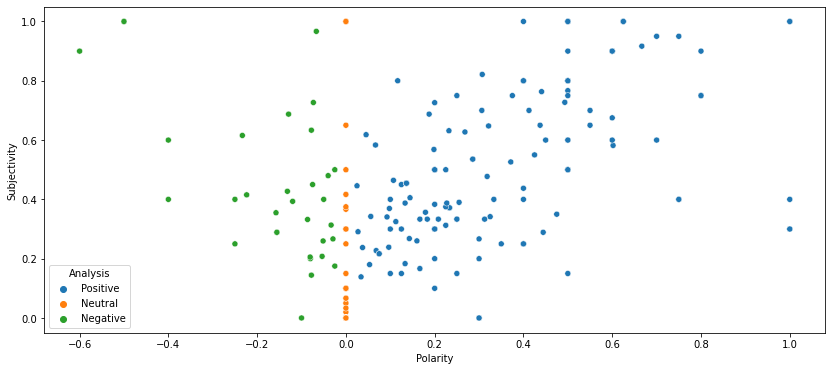

In [23]:
import seaborn as sns

plt.figure(figsize=(14,6))
sns.scatterplot(x = 'Polarity',y='Subjectivity', data= df, hue='Analysis')